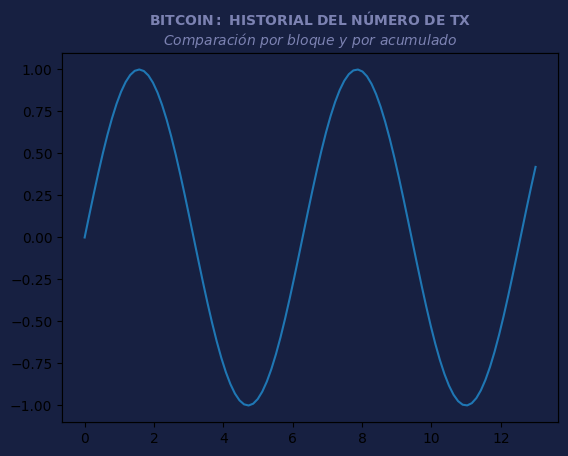

In [11]:
#librerias 


#usar comandos del sistema
import os
#manejo numerico
import numpy as np
#graficar
import matplotlib.pyplot as plt
#libreria manejo de tipografia
from matplotlib import font_manager as fm, rcParams

#cambiar la typografia
fpath = os.path.join(r'MonoLisaSimpson-Regular.ttf')
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]



# Estilos: ESTAS VARIABLES CONTIENEN ESTILOS
estilo_dark=[(124/255., 130/255., 178/255.), (23/255., 32/255., 65/255.), (23/255., 32/255., 65/255.),] 
# BLANCO , AZUL OSCURO , AZULOSCURO
estilo_dark2=[(237/255., 237/255., 237/255.), (64/255., 64/255., 64/255.), (64/255., 64/255., 64/255.),] 
# BLANCO , NEGRO , NEGRO
estilo_dark3=[(253/255., 253/255., 253/255.), (44/255., 44/255., 44/255.), (254/255., 254/255., 244/255.),] 
# BLANCO , NEGRO , BLANCO
estilo_blanco=[(58/255., 53/255., 59/255.), (255/255., 255/255., 255/255.), (255/255., 255/255., 255/255.),] 
# NEGRO, BLANCO , BLANCO
estilo_blanco2=[(80/255., 82/255., 81/255.), (255/255., 255/255., 255/255.), (255/255., 255/255., 255/255.),]
# NEGRO , BLANCO, BLANCO


#Estilos=[estilo_dark,estilo_blanco]
Estilos=[estilo_dark,estilo_dark2,estilo_dark3,estilo_blanco,estilo_blanco2]

# se tienen variables que contienen los colores del formato
# estilo[0]= Titulos y letras 
# estilo[1] = Fondo principal
# estilo[2] = Fondo imagen




# colores: ESTA VARIABLE CONTIENE COLORES
colores = [(141, 211, 199),(254, 255, 179),(31, 119, 180),] 
#colores = [(206, 213, 231),(144, 177, 237),(191, 176, 205),(109,145,181),(103,133,185)] 
#amarillo, azul claro, azul fuerte,
for i in range(len(colores)):
    r, g, b = colores[i]
    colores[i] = (r / 255., g / 255., b / 255.)



fig, ax = plt.subplots()
########
ax = plt.gca()
#titulo
plt.title(r"$\bf{BITCOIN:\ HISTORIAL\ DEL\ NÚMERO\ DE\ TX}$" "\n" r"$\it{Comparación\ por\ bloque\ y\ por\ acumulado}$",fontsize=10,color=Estilos[0][0],fontproperties=prop)


#Color del fondo
fig.patch.set_facecolor(Estilos[0][1])

#fondo dentro la grafica
plt.axes().patch.set_facecolor(Estilos[0][2])

ax.set_yticks([],[],)
ax.set_xticks([],[],)
###cuadricula
#plt.grid(False, color=colores[2],axis= 'both')


#color: 
#colores de los números
# ax.tick_params(axis='x')
# ax.tick_params(axis='y', colors='gray')
t=np.linspace(0,13,100)
#xt = np.random.randn(100)
xt=np.sin(t)
plt.plot(t,xt,label="disperso",color=colores[2])

plt.show()
#plt.savefig('test.png')
#Las gráficas objetivo 
#1 historial tamaño de bloque
#2 historial numero de transacciones
#3 hash rate 
#4 llegada de bloques

In [ ]:
rgb = (0,0,0)